## Importerer pakker

In [94]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preprocessing


# Model Selection and Evaluation
from sklearn.model_selection import train_test_split


## Leser inn renset fil

In [95]:
df_train = pd.read_csv('train_df.csv')
pd.set_option('display.max_columns', None)
pd.reset_option('display.float_format')

## Beskrivelse av data

In [96]:
df_train.describe()

oppholdslengde        alder    utdanning      inntekt   sykehusdød  \
count     5413.000000  5411.000000  4458.000000  3262.000000  5413.000000   
mean        17.646037    62.882462    11.692463    16.603617     0.263994   
std         21.417539    15.563223     3.425327    10.324904     0.440837   
min          3.000000    18.000000     0.000000     8.000000     0.000000   
25%          6.000000    53.000000    10.000000     8.000000     0.000000   
50%         11.000000    65.000000    12.000000     8.000000     0.000000   
75%         20.000000    74.000000    14.000000    20.000000     1.000000   
max        343.000000   102.000000    30.000000    35.000000     1.000000   

         blodtrykk  hvite_blodlegemer  hjertefrekvens  respirasjonsfrekvens  \
count  5413.000000        5413.000000     5413.000000           5413.000000   
mean     84.043137          12.219961       97.163809             23.344541   
std      27.696513           9.019123       31.677984              9.550372   
min       0.000000           0.000000        0.000000              0.000000   
25%      63.000000           7.000000       72.000000             18.000000   
50%      77.000000          10.500000      100.000000             24.000000   
75%     107.000000          15.099609      120.000000             28.000000   
max     195.000000         128.781250      232.000000             70.000000   

       kroppstemperatur  lungefunksjon  serumalbumin    bilirubin  \
count       5413.000000    5413.000000   5413.000000  5413.000000   
mean          37.119087     263.476420      3.153280     2.085970   
std            1.259334     103.343026      0.782000     4.407500   
min           31.699220      12.000000      0.399963     0.099991   
25%           36.195310     178.312500      2.699707     0.599976   
50%           36.695310     276.625000      3.500000     1.010000   
75%           38.195310     333.300000      3.500000     1.299805   
max           41.695310     869.375000     29.000000    54.796875   

         kreatinin      natrium      blod_ph      glukose  blodurea_nitrogen  \
count  5413.000000  5413.000000  4048.000000  2730.000000        5413.000000   
mean      1.786458   137.528173     7.414502   160.983883          20.082658   
std       1.691612     6.040926     0.081907    91.650084          23.338738   
min       0.099991   110.000000     6.829102     1.399902           1.000000   
25%       0.899902   134.000000     7.379883   103.000000           6.510000   
50%       1.199951   137.000000     7.419922   134.000000           6.510000   
75%       1.899902   141.000000     7.469727   191.000000          25.000000   
max      18.398438   181.000000     7.769531  1092.000000         192.000000   

        urinmengde     dødsfall  antall_komorbiditeter   koma_score  \
count  5413.000000  5413.000000            5413.000000  5413.000000   
mean   2347.766290     0.684463               1.860521    12.529281   
std     996.981841     0.464772               1.329889    25.197060   
min       0.000000     0.000000               0.000000     0.000000   
25%    2040.000000     0.000000               1.000000     0.000000   
50%    2502.000000     1.000000               2.000000     0.000000   
75%    2502.000000     1.000000               3.000000     9.000000   
max    9000.000000     1.000000               7.000000   100.000000   

       fysiologisk_score  apache_fysiologisk_score  overlevelsesestimat_2mnd  \
count        5413.000000                5413.00000               5413.000000   
mean           25.608652                  37.87179                  0.631458   
std            10.040329                  20.05021                  0.250473   
min             0.199982                   0.00000                  0.000000   
25%            19.000000                  23.00000                  0.498962   
50%            24.097656                  35.00000                  0.710938   
75%            30.296875                  49.00000        

## Korrelasjonsmatrise for numeriske variabler

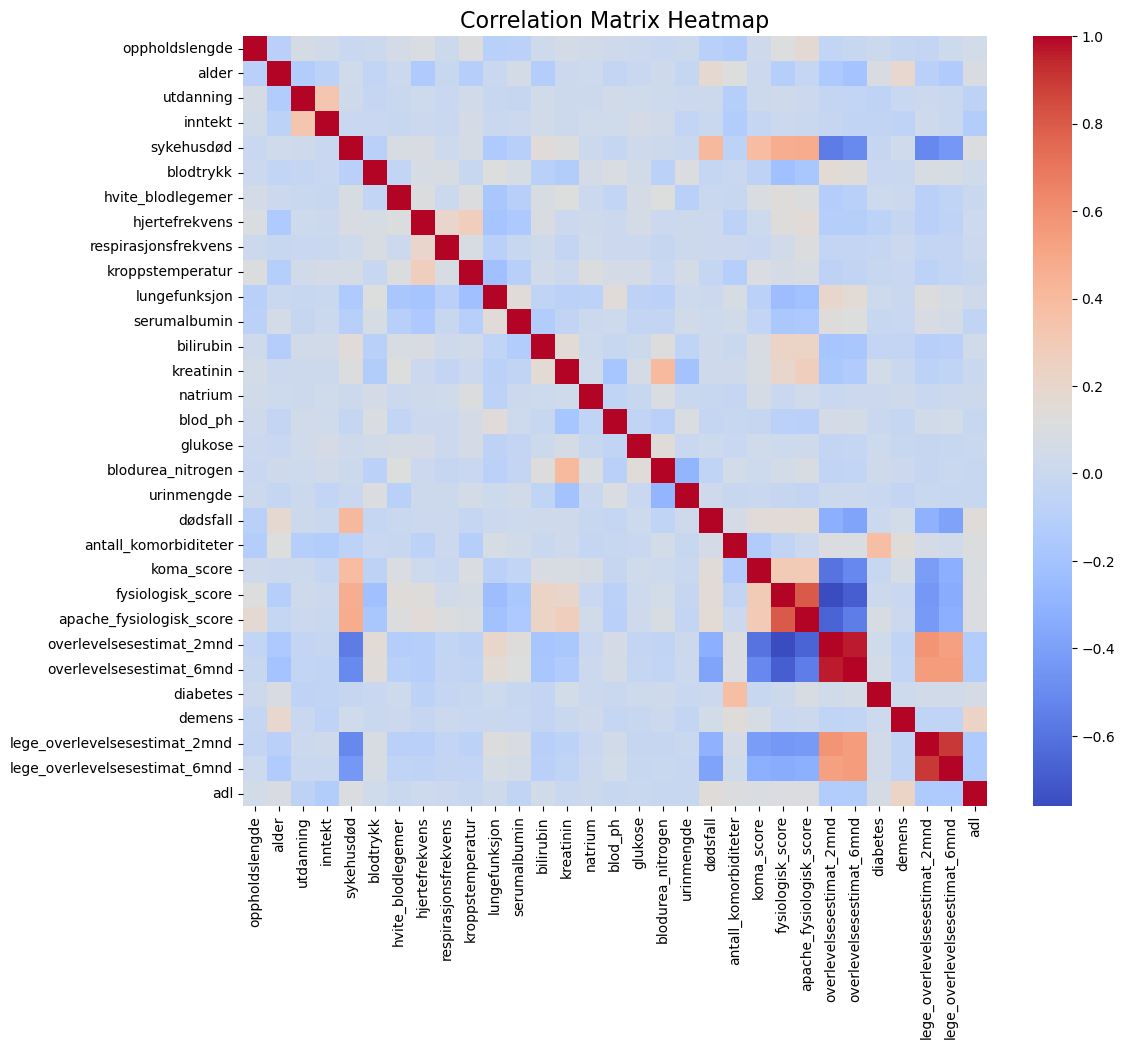

In [126]:
# Select only the numeric columns from the dataset
numeric_df = df_train.select_dtypes(include=[np.number])

# Compute the correlation matrix using only the numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(corr_matrix, cmap="coolwarm")  # Remove the annot parameter to hide values in cells
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

## Korrelasjonsmatrise avhengig av oppholdslengde

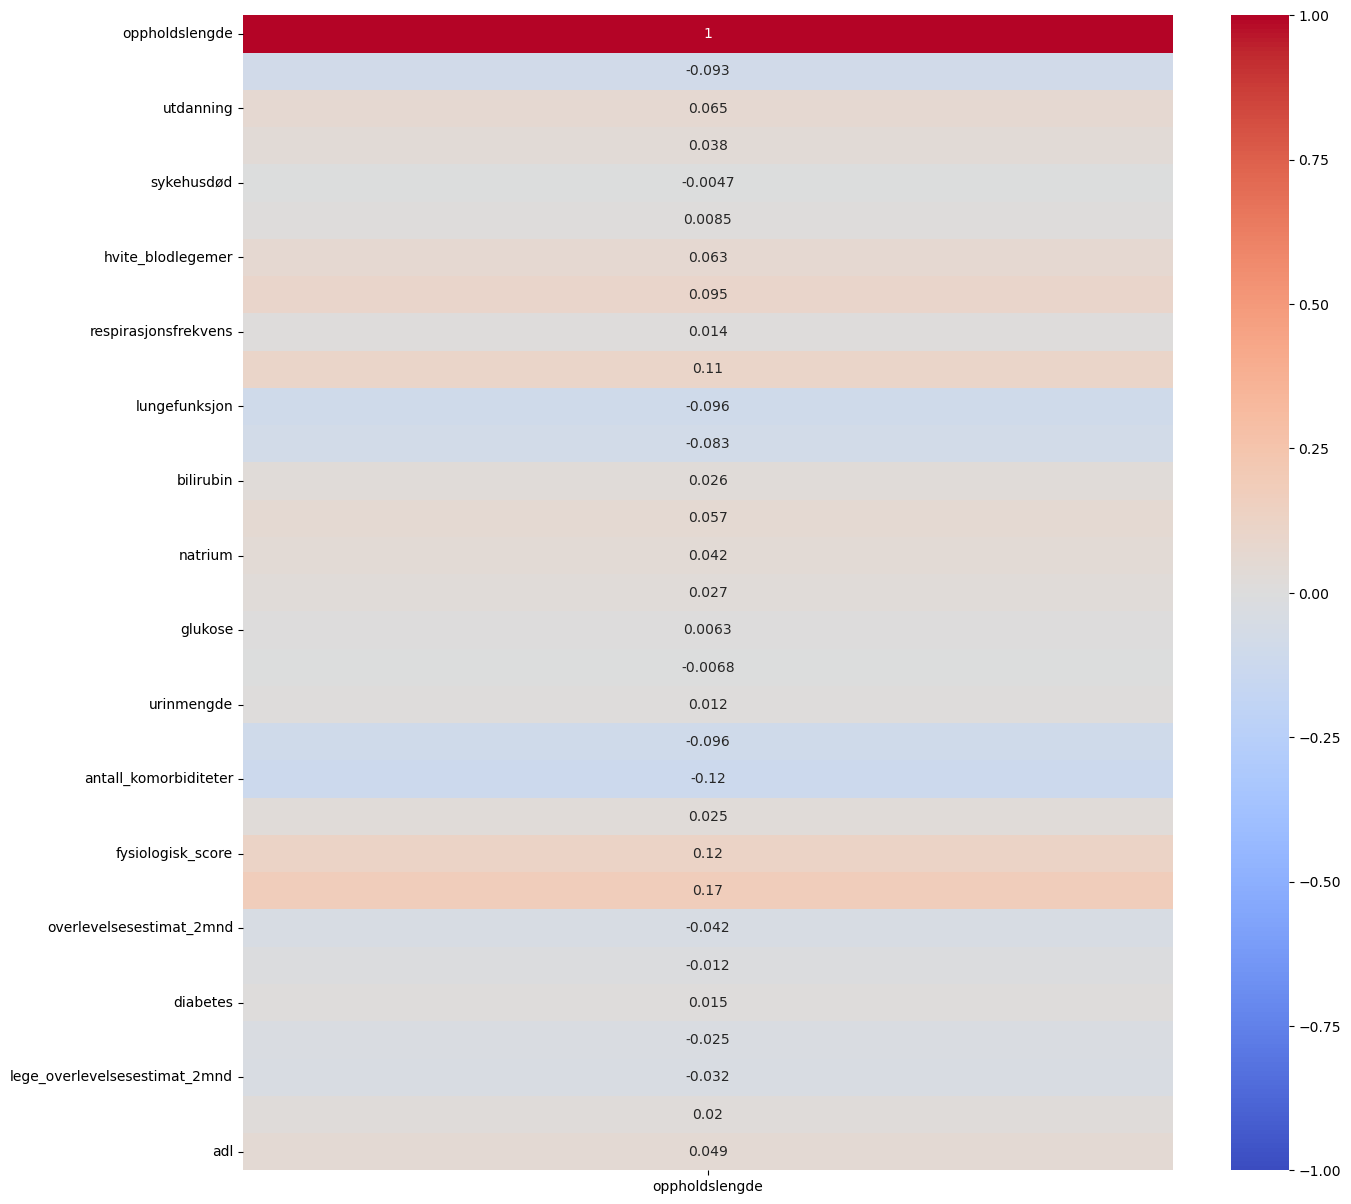

In [129]:
# Select only the numeric columns from the dataset
numeric_df = df_train.select_dtypes(include=[np.number])

# Compute the correlation matrix using only the numeric columns
corr_matrix = numeric_df.corr()
oppholdslengde_corr = corr_matrix[['oppholdslengde']]
sns.heatmap(oppholdslengde_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.gcf().set_size_inches(15, 15)

## Korrelasjonsmatrise avhengig av oppholdslengde delt opp med en terskel på 0.05

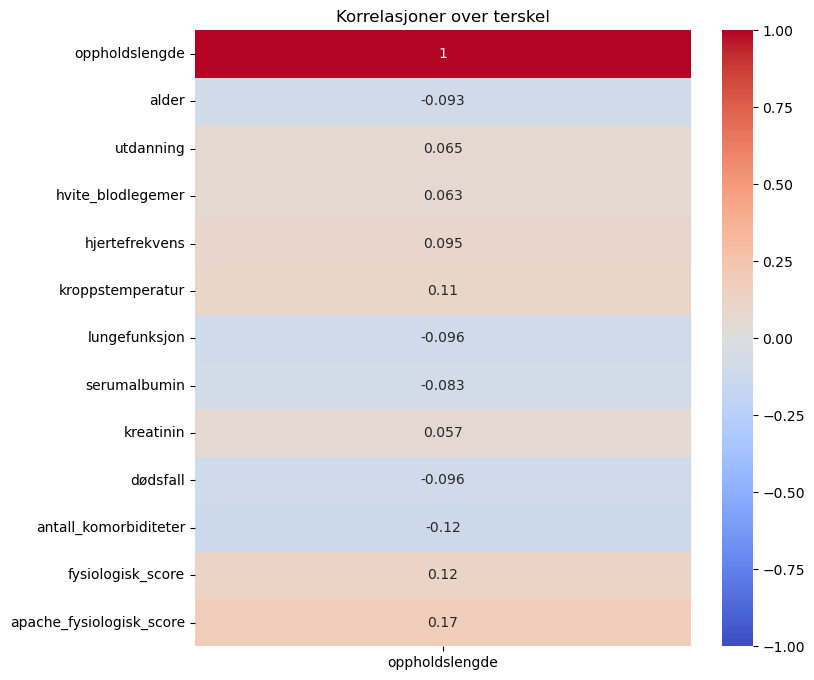

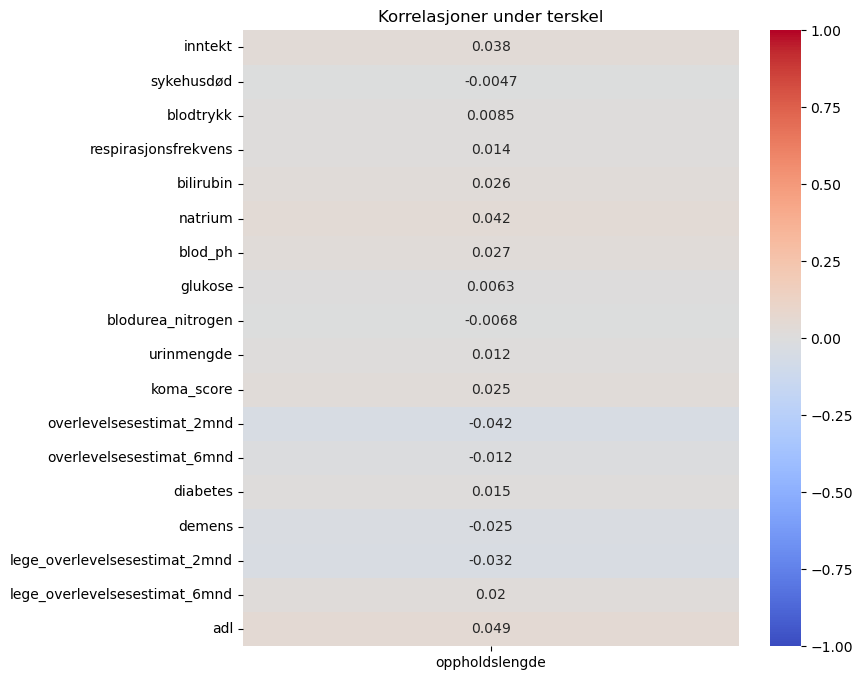

In [130]:
# Beregn korrelasjonsmatrisen
# Select only the numeric columns from the dataset
numeric_df = df_train.select_dtypes(include=[np.number])

# Compute the correlation matrix using only the numeric columns
corr_matrix = numeric_df.corr()

# Velg korrelasjoner med oppholdslengde
oppholdslengde_corr = corr_matrix[['oppholdslengde']]

# Definer terskel
threshold = 0.05

# Del korrelasjonsmatrisen i to
high_corr = oppholdslengde_corr[(oppholdslengde_corr['oppholdslengde'].abs() >= threshold)]
low_corr = oppholdslengde_corr[(oppholdslengde_corr['oppholdslengde'].abs() < threshold)]

# Plot heatmaps for hver del
plt.figure(figsize=(8, 8))
sns.heatmap(high_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.title("Korrelasjoner over terskel")
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(low_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.title("Korrelasjoner under terskel")
plt.show()

# Visualisering

## Visualisering av sykehusdata

In [131]:
sykehusdata = {'oppholdslengde', 'sykehusdød'}
for value in sykehusdata:
    fig = px.histogram(df_train, x=value)
    fig.show()

fig = px.box(df_train, x='sykehusdød', y='oppholdslengde')
fig.show()

Vi ser på oppholdslengde, at normal oppholdslengde befinner seg mellom 0-50. Likevel har vi en del outliers i intervallet 50-343

## Ser på dataen til outliers

In [132]:
long_stay_patients = df_train[df_train['oppholdslengde'] > 50]
long_stay_patients.describe(include='all')

oppholdslengde       alder kjønn   utdanning     inntekt etnisitet  \
count       313.000000  313.000000   313  253.000000  185.000000       312   
unique             NaN         NaN     2         NaN         NaN         5   
top                NaN         NaN  male         NaN         NaN     white   
freq               NaN         NaN   179         NaN         NaN       245   
mean         84.648562   59.293930   NaN   12.347826   17.989189       NaN   
std          38.795789   15.816552   NaN    2.938113   10.818658       NaN   
min          51.000000   18.000000   NaN    1.000000    8.000000       NaN   
25%          58.000000   49.000000   NaN   11.000000    8.000000       NaN   
50%          71.000000   62.000000   NaN   12.000000   20.000000       NaN   
75%          99.000000   71.000000   NaN   14.000000   20.000000       NaN   
max         343.000000   99.000000   NaN   21.000000   35.000000       NaN   

        sykehusdød   blodtrykk  hvite_blodlegemer  hjertefrekvens  \
count    313.00000  313.000000         313.000000      313.000000   
unique         NaN         NaN                NaN             NaN   
top            NaN         NaN                NaN             NaN   
freq           NaN         NaN                NaN             NaN   
mean       0.29393   85.166134          14.312699      105.367412   
std        0.45629   30.733833          10.059522       33.552998   
min        0.00000    0.000000           0.049995        0.000000   
25%        0.00000   61.000000           7.899414       74.000000   
50%        0.00000   76.000000          12.500000      112.000000   
75%        1.00000  109.000000          18.296875      128.000000   
max        1.00000  158.000000         104.000000      189.000000   

        respirasjonsfrekvens  kroppstemperatur  lungefunksjon  serumalbumin  \
count             313.000000        313.000000     313.000000    313.000000   
unique                   NaN               NaN            NaN           NaN   
top                      NaN               NaN            NaN           NaN   
freq                     NaN               NaN            NaN           NaN   
mean               23.466454         37.474866     227.551632      2.981342   
std                10.492656          1.243603      98.463077      0.722180   
min                 0.000000         34.000000      50.000000      0.500000   
25%                14.000000         36.500000     146.656250      2.399902   
50%                24.000000         37.593750     218.000000      3.199707   
75%                31.000000         38.500000     322.500000      3.500000   
max                52.000000         40.195310     520.000000      6.000000   

         bilirubin   kreatinin     natrium     blod_ph     glukose  \
count   313.000000  313.000000  313.000000  270.000000  156.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      2.637280    2.061530  138.616613    7.415925  161.380769   
std       4.898486    1.886837    6.580856    0.084692  105.475653   
min       0.199982    0.399963  123.000000    6.929688    1.399902   
25%       0.699951    0.899902  134.000000    7.369141   98.750000   
50%       1.010000    1.399902  138.000000    7.429688  125.500000   
75%       2.099609    2.399902  143.000000    7.469727  194.500000   
max      38.398438   12.898438  156.000000    7.659180  841.000000   

        blodurea_nitrogen   urinmengde sykdomskategori_id sykdomskategori  \
count          313.000000   313.000000                313             313   
unique                NaN          NaN                  3               3   
top                   NaN          NaN                A1s        ARF/MOSF   
freq                  NaN          NaN                260             260   
mean            20.583131  2331.319169                NaN          

In [135]:
long_stay_patients['sykdom_underkategori'].value_counts()

sykdom_underkategori
ARF/MOSF w/Sepsis    239
MOSF w/Malig          21
Coma                  17
COPD                  17
CHF                   14
Cirrhosis              5
Name: count, dtype: int64

In [134]:
df_train.describe(include='all')

oppholdslengde        alder kjønn    utdanning      inntekt etnisitet  \
count      5413.000000  5411.000000  5413  4458.000000  3262.000000      5387   
unique             NaN          NaN     2          NaN          NaN         5   
top                NaN          NaN  male          NaN          NaN     white   
freq               NaN          NaN  3041          NaN          NaN      4304   
mean         17.646037    62.882462   NaN    11.692463    16.603617       NaN   
std          21.417539    15.563223   NaN     3.425327    10.324904       NaN   
min           3.000000    18.000000   NaN     0.000000     8.000000       NaN   
25%           6.000000    53.000000   NaN    10.000000     8.000000       NaN   
50%          11.000000    65.000000   NaN    12.000000     8.000000       NaN   
75%          20.000000    74.000000   NaN    14.000000    20.000000       NaN   
max         343.000000   102.000000   NaN    30.000000    35.000000       NaN   

         sykehusdød    blodtrykk  hvite_blodlegemer  hjertefrekvens  \
count   5413.000000  5413.000000        5413.000000     5413.000000   
unique          NaN          NaN                NaN             NaN   
top             NaN          NaN                NaN             NaN   
freq            NaN          NaN                NaN             NaN   
mean       0.263994    84.043137          12.219961       97.163809   
std        0.440837    27.696513           9.019123       31.677984   
min        0.000000     0.000000           0.000000        0.000000   
25%        0.000000    63.000000           7.000000       72.000000   
50%        0.000000    77.000000          10.500000      100.000000   
75%        1.000000   107.000000          15.099609      120.000000   
max        1.000000   195.000000         128.781250      232.000000   

        respirasjonsfrekvens  kroppstemperatur  lungefunksjon  serumalbumin  \
count            5413.000000       5413.000000    5413.000000   5413.000000   
unique                   NaN               NaN            NaN           NaN   
top                      NaN               NaN            NaN           NaN   
freq                     NaN               NaN            NaN           NaN   
mean               23.344541         37.119087     263.476420      3.153280   
std                 9.550372          1.259334     103.343026      0.782000   
min                 0.000000         31.699220      12.000000      0.399963   
25%                18.000000         36.195310     178.312500      2.699707   
50%                24.000000         36.695310     276.625000      3.500000   
75%                28.000000         38.195310     333.300000      3.500000   
max                70.000000         41.695310     869.375000     29.000000   

          bilirubin    kreatinin      natrium      blod_ph      glukose  \
count   5413.000000  5413.000000  5413.000000  4048.000000  2730.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       2.085970     1.786458   137.528173     7.414502   160.983883   
std        4.407500     1.691612     6.040926     0.081907    91.650084   
min        0.099991     0.099991   110.000000     6.829102     1.399902   
25%        0.599976     0.899902   134.000000     7.379883   103.000000   
50%        1.010000     1.199951   137.000000     7.419922   134.000000   
75%        1.299805     1.899902   141.000000     7.469727   191.000000   
max       54.796875    18.398438   181.000000     7.769531  1092.000000   

        blodurea_nitrogen   urinmengde sykdomskategori_id sykdomskategori  \
count         5413.000000  5413.000000               5413            5413   
unique                NaN          NaN                  4               4   
top                   NaN          NaN                A1s        ARF/MOSF   
freq                  Na

In [136]:
df_train['sykdom_underkategori'].value_counts()

sykdom_underkategori
ARF/MOSF w/Sepsis    2093
CHF                   808
COPD                  580
Lung Cancer           563
MOSF w/Malig          404
Coma                  358
Colon Cancer          305
Cirrhosis             302
Name: count, dtype: int64

313 av 5413 pasienter har en oppholdslengde større enn 50 dager. Det som kjennetegner disse pasientene, er at de i gjennomsnitt har noe høyere fysiologiske verdier enn normalen. Likevel er denne endringen minimal, og det er ikke noe tydelig kjennetegn for pasienter som har lengre oppholdslengde.

## Visualisering av fysiologiske data

In [137]:
# List of physiological data to plot against hospital stay length
fysiologiske_data = ['blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens', 'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 'serumalbumin']

# Create a new column that represents if the hospital stay is longer than 150 days
df_train['long_stay'] = df_train['oppholdslengde'] > 150

# Loop through each physiological feature to create scatter plots
for value in fysiologiske_data:
    # Create the scatter plot with color distinction based on the long_stay condition
    fig = px.scatter(
        df_train, 
        x=value, 
        y="oppholdslengde", 
        color='long_stay', 
        labels={'long_stay': 'Long Hospital Stay (>150 days)', 'oppholdslengde': 'Hospital Stay Length'},
        title=f'Scatter Plot of {value} vs. Hospital Stay Length'
    )
    
    # Show the plot
    fig.show()

In [138]:
fysiologiske_data = {'natrium', 'blod_ph', 'glukose', 'blodurea_nitrogen', 'urinmengde', 'bilirubin', 'kreatinin'}
# Create a new column that represents if the hospital stay is longer than 150 days
df_train['long_stay'] = df_train['oppholdslengde'] > 150

# Loop through each physiological feature to create scatter plots
for value in fysiologiske_data:
    # Create the scatter plot with color distinction based on the long_stay condition
    fig = px.scatter(
        df_train, 
        x=value, 
        y="oppholdslengde", 
        color='long_stay', 
        labels={'long_stay': 'Long Hospital Stay (>150 days)', 'oppholdslengde': 'Hospital Stay Length'},
        title=f'Scatter Plot of {value} vs. Hospital Stay Length'
    )
    
    # Show the plot
    fig.show()

## Visualisering sykdom

In [139]:
# Visualisering av kjønn og pris
sykdommer = []
fig = px.box(df_train, x='sykdomskategori', y='oppholdslengde', color='sykdom_underkategori',
             title='Prisfordeling etter Kjønn for Titanic-passasjerer',
             labels={'Fare': 'Pris (Fare)', 'Sex': 'Kjønn'})

# Vis graf
fig.show()

Pasienter med sykdom_underkategorien ARF/MOSF w/Sepsis har lengre oppholdslengde enn andre sykdommer. I tillegg ser vi at selvom gjennomsnittet for ARF/MOSF w/Sepsis er noe normalt, finnes det mange outliers i intervallet 60-348.

In [140]:
sykdomsdata = {'antall_komorbiditeter', 'koma_score', 'adl', 'fysiologisk_score', 'apache_fysiologisk_score', 'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd'}
df_train['long_stay'] = df_train['oppholdslengde'] > 150

# Loop through each physiological feature to create scatter plots
for value in sykdomsdata:
    # Create the scatter plot with color distinction based on the long_stay condition
    fig = px.scatter(
        df_train, 
        x=value, 
        y="oppholdslengde", 
        color='long_stay', 
        labels={'long_stay': 'Long Hospital Stay (>150 days)', 'oppholdslengde': 'Hospital Stay Length'},
        title=f'Scatter Plot of {value} vs. Hospital Stay Length'
    )
    
    # Show the plot
    fig.show()

In [141]:
fig = px.scatter(df_train, x='fysiologisk_score', y="oppholdslengde", color='sykehusdød')
fig.show()

Vi ser at fysiologisk score henger sammen med oppholdslengden. Dersom fysiologisk score er lav er oppholdslengden lav, trolig grunnet at pasienten blir frisk. Dersom fysiologisk score er høy, er også oppholdslengden lav men grunnet at pasienten dør tidlig. De pasientene med middels høy fysiologisk score har lengst oppholdslengde grunnet behandlingen de behøver

In [142]:
fig = px.scatter(df_train, x='apache_fysiologisk_score', y="oppholdslengde", color='sykehusdød')
fig.show()

In [143]:
fig = px.scatter(df_train, x='fysiologisk_score', y='oppholdslengde', color='sykdom_underkategori')
fig.show()

## Visualisering av manglende data

In [145]:
manglende_numeriske_data = ['alder', 'utdanning', 'inntekt', 'etnisitet', 'blod_ph', 'glukose', 'lege_overlevelsesestimat_2mnd', 'lege_overlevelsesestimat_6mnd', 'dnr_status', 'adl']

for value in manglende_numeriske_data:
    fig =px.histogram(df_train, value)
    fig.show()

    